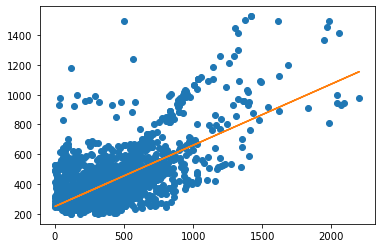

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
numerical = df.select_dtypes(include=np.number)
numerical.dropna(inplace=True)
X = numerical.drop('total_claim_amount', axis=1)
y = numerical['total_claim_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(np.array(X_train))
X_train_scaled = scaler.transform(np.array(X_train))
lm = LinearRegression() # fit_intercept = True
model = lm.fit(X_train_scaled,y_train)
X_test_scaled = scaler.transform(np.array(X_test))
y_pred = model.predict(X_test_scaled)
residuals = np.array(y_test - y_pred)
res_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred, 'residual':residuals})
plt.plot(y_test, y_pred, 'o')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test+b)

In [2]:
# Model Validation

R2=r2_score(y_test,y_pred)
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)

print("MSE:", mse(y_test,y_pred))                # Mean Squared Error
print("RMSE:", np.sqrt(mse(y_test,y_pred)))      # Root Mean Square Error
print("MAE:", mae(y_test,y_pred))                # Mean Absolute Error
print("R2:", R2)                                 # Coefficient of Determination (R2)
print("Adj_R2:", Adj_R2)                         # Adjusted R2
print("R2_train:", R2_train)                     # R2 Train
print("R2_test:", R2_test)                       # R2 Test = R2

MSE: 48603.25525355552
RMSE: 220.4614597918546
MAE: 150.17517808486429
R2: 0.40127309153524027
Adj_R2: 0.3993054444182199
R2_train: 0.411514336844104
R2_test: 0.40127309153524027


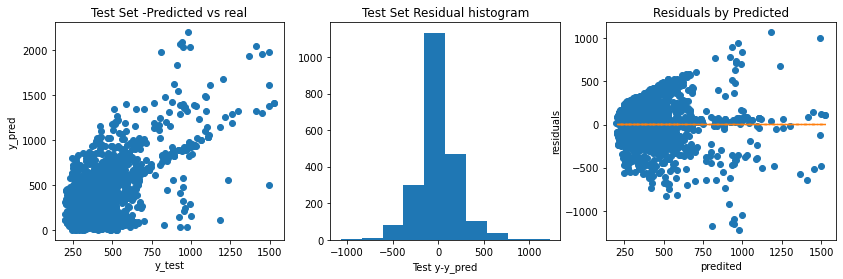

In [3]:
# y_pred vs y scatterplot
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_ylabel("y_pred")
ax[0].set_xlabel("y_test")
ax[0].set_title("Test Set -Predicted vs real")

# Residual histogram: check normality of distribution
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

# Homoscedasticity Check
ax[2].plot(y_pred,y_pred-y_test,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

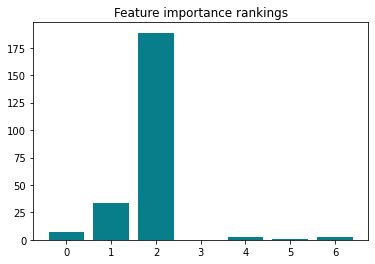

,Variable,Importance,name
2,2,188.742534,monthly_premium_auto
1,1,33.567786,income
0,0,7.443740,customer_lifetime_value
4,4,3.003318,months_since_policy_inception
6,6,2.407075,number_of_policies
5,5,0.286639,number_of_open_complaints
3,3,0.127913,months_since_last_claim


In [4]:
feature_importances = pd.DataFrame(data={
    'Variable': pd.DataFrame(X_train_scaled).columns,
    'Importance': abs(model.coef_.reshape(len(pd.DataFrame(X_train_scaled).columns),))
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.bar(x=feature_importances['Variable'].iloc[:],
height=feature_importances['Importance'].iloc[:], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='horizontal')
plt.show()

important_features = feature_importances.sort_values('Importance', ascending=False).head(8)
features = numerical.columns
important_features['name'] = features[important_features['Variable']]
important_features